In [10]:
import cartopy.crs
import cartopy.mpl.ticker
import intake
import matplotlib.pyplot
import numpy

In [11]:
# !pip list

In [12]:
# !conda install pyinterp -c conda-forge -y

In [13]:
import pyinterp
mesh = pyinterp.RTree()

In [14]:
cat_url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore" \
    "/master/intake-catalogs/ocean/llc4320.yaml"
cat = intake.open_catalog(cat_url)

In [15]:
array = cat.LLC4320_grid.to_dask()

In [25]:
array

<xarray.Dataset>
Dimensions:  (face: 13, j: 4320, i: 4320, k_p1: 2, j_g: 4320, i_g: 4320,
              time: 9030)
Coordinates: (12/37)
    CS       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    Depth    (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    PHrefC   float32 ...
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    ...       ...
    k_u      int64 ...
    rA       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAs      (face, j_g, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAw      (face, j, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAz      (face, j_g, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.6
    history:      Created by calling `open_mdsdataset(llc_method='smallchunks...
    source:       MITgcm
    title:        netCDF wrapper of MITgcm MDS binary data

In [16]:
indices = slice(0, None, 8)

In [17]:
lons = array["XC"].isel(i=indices, j=indices)
lats = array["YC"].isel(i=indices, j=indices)

In [26]:
lons

<xarray.DataArray 'XC' (face: 13, j: 540, i: 540)>
dask.array<getitem, shape=(13, 540, 540), dtype=float32, chunksize=(1, 540, 540), chunktype=numpy.ndarray>
Coordinates: (12/18)
    CS       (face, j, i) float32 dask.array<chunksize=(1, 540, 540), meta=np.ndarray>
    Depth    (face, j, i) float32 dask.array<chunksize=(1, 540, 540), meta=np.ndarray>
    PHrefC   float32 ...
    SN       (face, j, i) float32 dask.array<chunksize=(1, 540, 540), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(1, 540, 540), meta=np.ndarray>
    YC       (face, j, i) float32 dask.array<chunksize=(1, 540, 540), meta=np.ndarray>
    ...       ...
  * i        (i) int64 0 8 16 24 32 40 48 ... 4264 4272 4280 4288 4296 4304 4312
  * j        (j) int64 0 8 16 24 32 40 48 ... 4264 4272 4280 4288 4296 4304 4312
    k        int64 ...
    k_l      int64 ...
    k_u      int64 ...
    rA       (face, j, i) float32 dask.array<chunksize=(1, 540, 540), meta=np.ndarray>
Attributes:
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [18]:
ssh = cat.LLC4320_SSH.to_dask()
ssh

,Array,Chunk
Bytes,7.97 TiB,71.19 MiB
Shape,"(9030, 13, 4320, 4320)","(1, 1, 4320, 4320)"
Count,117391 Tasks,117390 Chunks
Type,float32,numpy.ndarray


In [19]:
ssh = ssh["Eta"].isel(time=0, i=indices, j=indices)
ssh

<xarray.DataArray 'Eta' (face: 13, j: 540, i: 540)>
dask.array<getitem, shape=(13, 540, 540), dtype=float32, chunksize=(1, 540, 540), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 8 16 24 32 40 48 ... 4264 4272 4280 4288 4296 4304 4312
  * j        (j) int64 0 8 16 24 32 40 48 ... 4264 4272 4280 4288 4296 4304 4312
    time     datetime64[ns] 2011-09-13

In [20]:
mesh.packing(
    numpy.vstack((lons.values.ravel(), lats.values.ravel())).T,
    ssh.values.ravel())

In [27]:
mesh

In [21]:
x0, x1 = 100, 170
y0, y1 = -15, 30
res = 1 / 48.0
mx, my = numpy.meshgrid(numpy.arange(x0, x1, res),
                        numpy.arange(y0, y1, res),
                        indexing="ij")

In [22]:
idw_eta, neighbors = mesh.inverse_distance_weighting(
    numpy.vstack((mx.ravel(), my.ravel())).T,
    within=True,  # Extrapolation is forbidden
    radius=55000,  # In a radius of 5.5 Km
    k=8,  # We are looking for at most 8 neighbours
    num_threads=0)
idw_eta = idw_eta.reshape(mx.shape)

In [23]:
rbf_eta, neighbors = mesh.radial_basis_function(
    numpy.vstack((mx.ravel(), my.ravel())).T,
    within=True,  # Extrapolation is forbidden
    k=11,  # We are looking for at most 11 neighbours
    num_threads=0)
rbf_eta = rbf_eta.reshape(mx.shape)

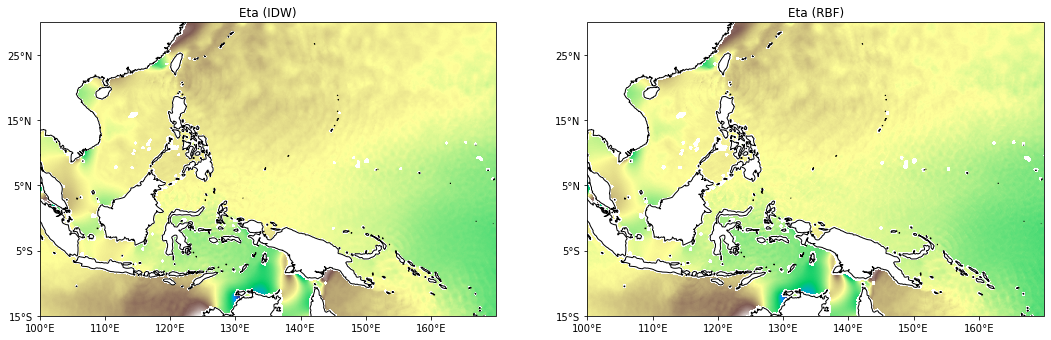

In [24]:
fig = matplotlib.pyplot.figure(figsize=(18, 9))

lon_formatter = cartopy.mpl.ticker.LongitudeFormatter(
    zero_direction_label=True)
lat_formatter = cartopy.mpl.ticker.LatitudeFormatter()

ax = fig.add_subplot(121, projection=cartopy.crs.PlateCarree())
ax.pcolormesh(mx,
              my,
              idw_eta,
              cmap='terrain',
              shading='auto',
              transform=cartopy.crs.PlateCarree())

ax.coastlines()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks(numpy.arange(x0, x1, 10.0))
ax.set_yticks(numpy.arange(y0, y1, 10))
ax.set_title("Eta (IDW)")

ax = fig.add_subplot(122, projection=cartopy.crs.PlateCarree())
ax.pcolormesh(mx,
              my,
              rbf_eta,
              cmap='terrain',
              shading='auto',
              transform=cartopy.crs.PlateCarree())
ax.coastlines()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks(numpy.arange(x0, x1, 10.0))
ax.set_yticks(numpy.arange(y0, y1, 10))
ax.set_title("Eta (RBF)")
fig.show()